Bono parte 1

In [1]:
!pip install beautifulsoup4

In [73]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoodpop.htm'


response = requests.get(url)

if response.ok:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', class_='light_table right')
    data = []
    for row in table.find_all('tr'):
        if row.find('th') or row.find('td'):
            cells = [cell.text.strip() if cell.text.strip() != '\xa0' else '' for cell in row.find_all(['td', 'th'])]
            data.append(cells)
    df = pd.DataFrame(data)
    for row in data:
        print(row)

else:
    print('Error:', response.status_code)


['Borough', 'region', 'Males', 'Females', 'Total Population']
['Bronx', 'Riverdale, Fieldston & Kingsbridge', '52,133', '61,937', '114,070']
['', 'Wakefield, Williamsbridge & Woodlawn', '65,087', '77,848', '142,935']
['', 'Co-op City, Pelham Bay & Schuylerville', '55,615', '65,929', '121,544']
['', 'Pelham Parkway, Morris Park & Laconia', '61,233', '67,896', '129,130']
['', 'Belmont, Crotona Park East & East Tremont', '75,963', '87,740', '163,704']
['', 'Bedford Park, Fordham North & Norwood', '62,664', '68,016', '130,681']
['', 'Morris Heights, Fordham South & Mount Hope', '64,748', '71,644', '136,391']
['', 'Concourse, Highbridge & Mount Eden', '67,535', '74,968', '142,504']
['', 'Castle Hill, Clason Point & Parkchester', '87,605', '99,401', '187,006']
['', 'Hunts Point, Longwood & Melrose', '80,447', '78,645', '159,091']
['Kings (Brooklyn)', 'Greenpoint & Williamsburg', '75,780', '76,636', '152,416']
['', 'Bushwick', '65,255', '65,960', '131,215']
['', 'Bedford-Stuyvesant', '63,462'

In [14]:
df.head()

,0,1,2,3,4
0,Borough,region,Males,Females,Total Population
1,Bronx,"Riverdale, Fieldston & Kingsbridge","52,133","61,937","114,070"
2,,"Wakefield, Williamsbridge & Woodlawn","65,087","77,848","142,935"
3,,"Co-op City, Pelham Bay & Schuylerville","55,615","65,929","121,544"
4,,"Pelham Parkway, Morris Park & Laconia","61,233","67,896","129,130"


In [74]:
nuevos_nombres = df.iloc[0]

df = df[1:]

df.columns = nuevos_nombres

In [17]:
df.head()

,Borough,region,Males,Females,Total Population
1,Bronx,"Riverdale, Fieldston & Kingsbridge","52,133","61,937","114,070"
2,,"Wakefield, Williamsbridge & Woodlawn","65,087","77,848","142,935"
3,,"Co-op City, Pelham Bay & Schuylerville","55,615","65,929","121,544"
4,,"Pelham Parkway, Morris Park & Laconia","61,233","67,896","129,130"
5,,"Belmont, Crotona Park East & East Tremont","75,963","87,740","163,704"


In [75]:
for col in ['Males', 'Females', 'Total Population']:
        df[col] = df[col].str.replace(',', '').astype(int)

In [76]:
df.head()

,Borough,region,Males,Females,Total Population
1,Bronx,"Riverdale, Fieldston & Kingsbridge",52133,61937,114070
2,,"Wakefield, Williamsbridge & Woodlawn",65087,77848,142935
3,,"Co-op City, Pelham Bay & Schuylerville",55615,65929,121544
4,,"Pelham Parkway, Morris Park & Laconia",61233,67896,129130
5,,"Belmont, Crotona Park East & East Tremont",75963,87740,163704


In [77]:
print(df['Borough'][1])

Bronx


In [78]:
momentaneo = ""
j = 0
for i in df["Borough"]:
  if i is not "":
      print("entro")
      momentaneo = i
      j = j+1
      print(f"Es {momentaneo}")
  else:
      print(f"Nuevo {j}")
      j = j+1
      df["Borough"][j] = momentaneo


df.head()


entro
Es Bronx
Nuevo 1
Nuevo 2
Nuevo 3
Nuevo 4
Nuevo 5
Nuevo 6
Nuevo 7
Nuevo 8
Nuevo 9
entro
Es Kings (Brooklyn)
Nuevo 11
Nuevo 12
Nuevo 13
Nuevo 14
Nuevo 15
Nuevo 16
Nuevo 17
Nuevo 18
Nuevo 19
Nuevo 20
Nuevo 21
Nuevo 22
Nuevo 23
Nuevo 24
Nuevo 25
Nuevo 26
Nuevo 27
entro
Es New York (Manhattan)
Nuevo 29
Nuevo 30
Nuevo 31
Nuevo 32
Nuevo 33
Nuevo 34
Nuevo 35
Nuevo 36
Nuevo 37
entro
Es Queens
Nuevo 39
Nuevo 40
Nuevo 41
Nuevo 42
Nuevo 43
Nuevo 44
Nuevo 45
Nuevo 46
Nuevo 47
Nuevo 48
Nuevo 49
Nuevo 50
Nuevo 51
entro
Es Richmond (Staten Island)
Nuevo 53
Nuevo 54


<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-78-c76f01ad1845>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if i is not "":
<ipython-input-78-c76f01ad1845>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Borough"][j] = momentaneo


,Borough,region,Males,Females,Total Population
1,Bronx,"Riverdale, Fieldston & Kingsbridge",52133,61937,114070
2,Bronx,"Wakefield, Williamsbridge & Woodlawn",65087,77848,142935
3,Bronx,"Co-op City, Pelham Bay & Schuylerville",55615,65929,121544
4,Bronx,"Pelham Parkway, Morris Park & Laconia",61233,67896,129130
5,Bronx,"Belmont, Crotona Park East & East Tremont",75963,87740,163704


In [67]:
df

,Borough,region,Males,Females,Total Population
1,Bronx,"Riverdale, Fieldston & Kingsbridge","52,133","61,937","114,070"
2,Bronx,"Wakefield, Williamsbridge & Woodlawn","65,087","77,848","142,935"
3,Bronx,"Co-op City, Pelham Bay & Schuylerville","55,615","65,929","121,544"
4,Bronx,"Pelham Parkway, Morris Park & Laconia","61,233","67,896","129,130"
5,Bronx,"Belmont, Crotona Park East & East Tremont","75,963","87,740","163,704"
6,Bronx,"Bedford Park, Fordham North & Norwood","62,664","68,016","130,681"
7,Bronx,"Morris Heights, Fordham South & Mount Hope","64,748","71,644","136,391"
8,Bronx,"Concourse, Highbridge & Mount Eden","67,535","74,968","142,504"
9,Bronx,"Castle Hill, Clason Point & Parkchester","87,605","99,401","187,006"
10,Bronx,"Hunts Point, Longwood & Melrose","80,447","78,645","159,091"


In [79]:
csv_filename = 'PopulationC.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:

        csvwriter = csv.writer(csvfile)
        csvwriter.writerows(df)

<ipython-input-83-52a119fc37e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('Borough').sum()


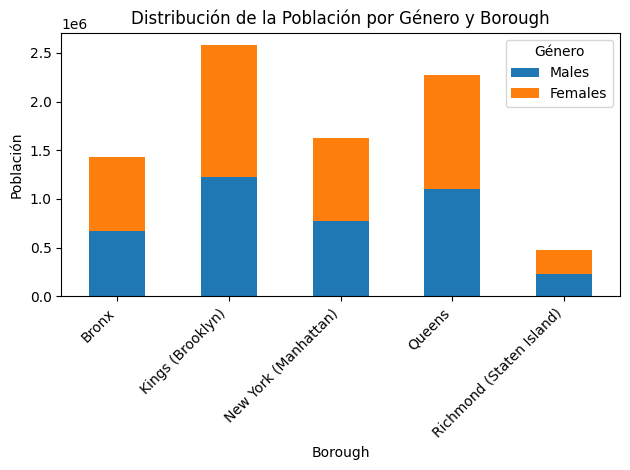

In [83]:

grouped = df.groupby('Borough').sum()
grouped[['Males', 'Females']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

plt.title('Distribución de la Población por Género y Borough')
plt.xlabel('Borough')
plt.ylabel('Población')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


Bono Parte 2 (Nota: por alguna razón no acepta las credenciales)

In [84]:
df2 = pd.read_csv("/content/NYPD_Arrest_Data__Year_to_Date__20240226.csv")

In [86]:
df2.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261265483,01/03/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,261336449,01/04/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054)
3,261328047,01/04/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
4,261417496,01/05/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,B,44,0,25-44,F,BLACK,1007174,239542,40.824135,-73.917170,POINT (-73.91717 40.824135)


In [89]:
api_key = 'c920bafb3c7558cefba53c55fd3ba288'

df2['Temperature'] = None
df2['Weather Description'] = None


for index, row in df2.iterrows():

    url = f'https://api.openweathermap.org/data/3.0/onecall?lat={row["Latitude"]}&lon={row["Longitude"]}&exclude=alerts&units=standard&appid={api_key}'
    print(url)
    response = requests.get(url)

    if response.ok:
        weather_data = response.json()
        df2.at[index, 'Temperature'] = weather_data['current']['temp']
        df2.at[index, 'Weather Description'] = weather_data['current']['weather'][0]['description']
    else:
        print(f"Error: {response.status_code} en la fila {index}")

print(df2)

Se han truncado las últimas 5000 líneas del flujo de salida.
Error: 401 en la fila 7566
https://api.openweathermap.org/data/3.0/onecall?lat=40.7434812638841&lon=-73.8740035373971&exclude=alerts&units=standard&appid=c920bafb3c7558cefba53c55fd3ba288
Error: 401 en la fila 7567
https://api.openweathermap.org/data/3.0/onecall?lat=40.83872163&lon=-73.91377061&exclude=alerts&units=standard&appid=c920bafb3c7558cefba53c55fd3ba288
Error: 401 en la fila 7568
https://api.openweathermap.org/data/3.0/onecall?lat=40.680001&lon=-73.752339&exclude=alerts&units=standard&appid=c920bafb3c7558cefba53c55fd3ba288
Error: 401 en la fila 7569
https://api.openweathermap.org/data/3.0/onecall?lat=40.604847&lon=-73.977593&exclude=alerts&units=standard&appid=c920bafb3c7558cefba53c55fd3ba288
Error: 401 en la fila 7570
https://api.openweathermap.org/data/3.0/onecall?lat=40.885489&lon=-73.900443&exclude=alerts&units=standard&appid=c920bafb3c7558cefba53c55fd3ba288
Error: 401 en la fila 7571
https://api.openweathermap.or

KeyboardInterrupt: 

In [91]:
url = f"https://api.openweathermap.org/data/3.0/onecall?lat=33.44&lon=-94.04&exclude=hourly,daily&appid={api_key}"

In [92]:
response = requests.get(url)

In [93]:
print(response)

<Response [401]>
